In [1]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import geopandas as gpd
import matplotlib.image as mpimg
from shapely.geometry import Point, LineString

ModuleNotFoundError: No module named 'geopandas'

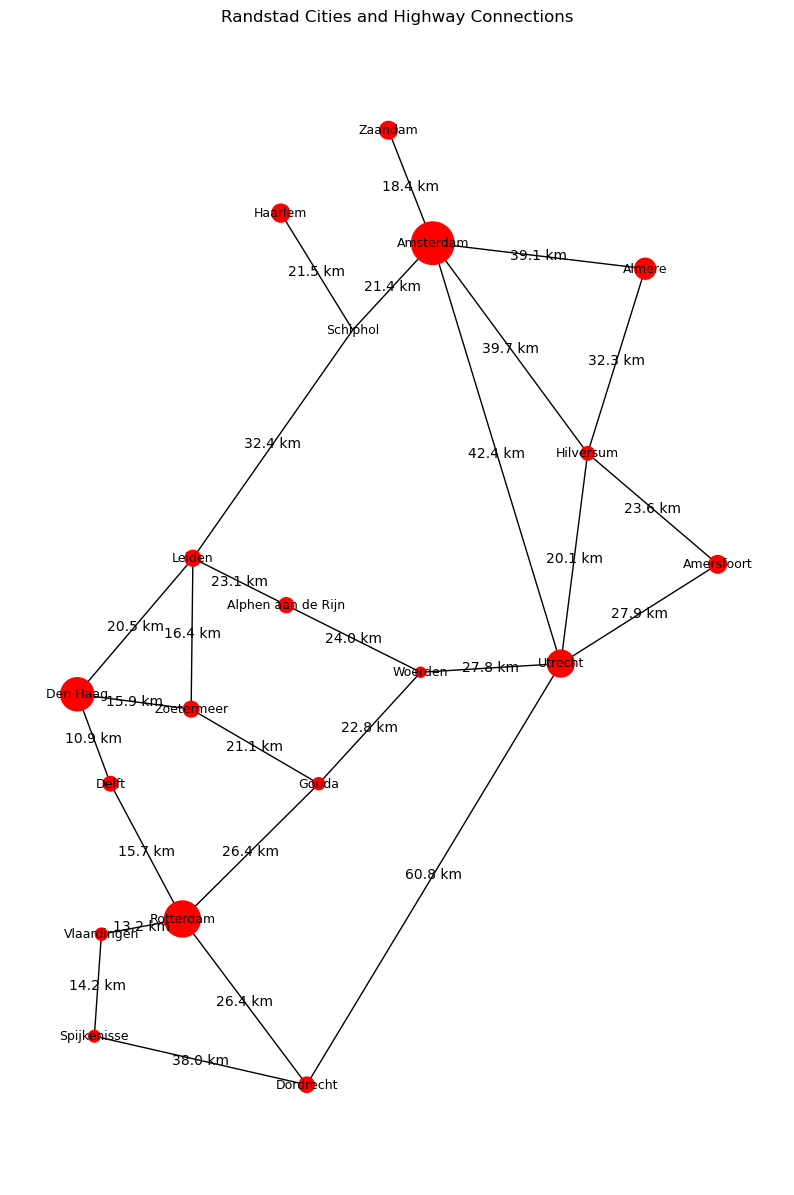

In [2]:
# Your cities and their geographical coordinates
cities_coords = {
    "Zaandam": (52.442, 4.829),
    "Amsterdam": (52.3676, 4.9041),
    "Haarlem": (52.3874, 4.6462),
    "Schiphol": (52.3105, 4.7683),
    "Leiden": (52.1601, 4.4970),
    "Den Haag": (52.0705, 4.3007),
    "Zoetermeer": (52.0607, 4.4940),
    "Delft": (52.0116, 4.3571),
    "Rotterdam": (51.9225, 4.4792),
    "Spijkenisse": (51.8453, 4.3297),
    "Dordrecht": (51.8133, 4.6901),
    "Vlaardingen": (51.9125, 4.3417),
    "Alphen aan de Rijn": (52.1292, 4.6555),
    "Gouda": (52.0116, 4.7105),
    "Woerden": (52.0850, 4.8836),
    "Utrecht": (52.0907, 5.1214),
    "Hilversum": (52.2292, 5.1669),
    "Almere": (52.3508, 5.2647),
    "Amersfoort": (52.1561, 5.3878),
}
connections = [
    (42.4, "Amsterdam", "Utrecht"),
    (32.4, "Leiden", "Schiphol"),
    (20.5, "Den Haag", "Leiden"),
    (21.1, "Gouda", "Zoetermeer"),
    (22.8, "Woerden", "Gouda"),
    (27.8, "Utrecht", "Woerden"),
    (10.9, "Den Haag", "Delft"),
    (18.4, "Amsterdam", "Zaandam"),
    (39.1, "Amsterdam", "Almere"),
    (39.7, "Amsterdam", "Hilversum"),
    (21.4, "Amsterdam", "Schiphol"),
    (32.3, "Almere", "Hilversum"),
    (23.6, "Amersfoort", "Hilversum"),
    (20.1, "Hilversum", "Utrecht"),
    (27.9, "Amersfoort", "Utrecht"),
    (21.5, "Haarlem", "Schiphol"),
    (23.1, "Leiden", "Alphen aan de Rijn"),
    (16.4, "Leiden", "Zoetermeer"),
    (24.0, "Woerden", "Alphen aan de Rijn"),
    (15.9, "Zoetermeer", "Den Haag"),
    (15.7, "Delft", "Rotterdam"),
    (26.4, "Rotterdam", "Gouda"),
    (13.2, "Rotterdam", "Vlaardingen"),
    (26.4, "Rotterdam", "Dordrecht"),
    (14.2, "Vlaardingen", "Spijkenisse"),
    (38.0, "Spijkenisse", "Dordrecht"),
    (60.8, "Dordrecht", "Utrecht"),
]
cities_population = {
    "Zaandam": 161429,
    "Amsterdam": 934927,
    "Haarlem": 167763,
    "Schiphol": 1,
    "Leiden": 130181,
    "Den Haag": 565701,
    "Zoetermeer": 128424,
    "Delft": 109573,
    "Rotterdam": 671125,
    "Spijkenisse": 71390,
    "Dordrecht": 122089,
    "Vlaardingen": 76472,
    "Alphen aan de Rijn": 114968,
    "Gouda": 75763,
    "Woerden": 53237,
    "Utrecht": 374411,
    "Hilversum": 94426,
    "Almere": 226630,
    "Amersfoort": 160747
}
# Create a networkx graph
G = nx.Graph()

# Add nodes to the graph
for city, (lat, lon) in cities_coords.items():
    population = cities_population.get(city, 0)  # Default to 0 if not found
    G.add_node(city, pos=(lon, lat), population=population, weight=population)
# Add edges to the graph
for distance, city1, city2 in connections:
    G.add_edge(city1, city2, weight=distance)

# Load the PNG image
#img = mpimg.imread('/path/to/your/SnelwegenNederland_2008.png')  # Update the path to the image

# Get positions for cities to use for layout
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
fig, ax = plt.subplots(figsize=(10, 15))
#ax.imshow(img, extent=[3.2, 7.4, 50.7, 53.7])  # You might need to adjust the extent to fit your image
node_sizes = [G.nodes[city]['population'] / 1000 for city in G.nodes]
# Draw the network
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='red', ax=ax)
nx.draw_networkx_labels(G, pos, font_size=9, ax=ax)
nx.draw_networkx_edges(G, pos, ax=ax)

# Annotate the edges with distances
for (city1, city2, data) in G.edges(data=True):
    edge_midpoint = [(pos[city1][0] + pos[city2][0]) / 2, (pos[city1][1] + pos[city2][1]) / 2]
    ax.text(edge_midpoint[0], edge_midpoint[1], f"{data['weight']} km", size=10, ha='center', va='center')

# Set the title and remove the axis
ax.set_title('Randstad Cities and Highway Connections')
plt.axis('off')  # Turn off the axis
plt.show()

In [3]:
closeness_centrality = nx.closeness_centrality(G, distance='weight')
sorted_closeness = sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True)

# Print the sorted closeness centrality values
for city, centrality in sorted_closeness:
    print(f"{city}: {centrality}")

Leiden: 0.017860686644175432
Gouda: 0.01722488038277512
Zoetermeer: 0.01712817584927205
Woerden: 0.01670998886000742
Den Haag: 0.016672841793256763
Utrecht: 0.015836705965159247
Schiphol: 0.015781167806417674
Delft: 0.015669887699138157
Rotterdam: 0.015600624024961002
Alphen aan de Rijn: 0.015105740181268881
Amsterdam: 0.01456782130139204
Hilversum: 0.013626040878122633
Vlaardingen: 0.013315579227696408
Dordrecht: 0.013155971349217952
Haarlem: 0.01195139764955846
Amersfoort: 0.011733263802881169
Zaandam: 0.011624903125807285
Spijkenisse: 0.01157556270096463
Almere: 0.010952902519167577


In [18]:
# scalars (six)
sum_scalars = 0
for node in G.nodes:
    population = G.nodes[node]['population']
    if population < 50000:
        G.nodes[node]['population_scalar'] = 0.25
    elif 50000 <= population < 150000:
        G.nodes[node]['population_scalar'] = 1
    elif 150000 <= population < 250000:
        G.nodes[node]['population_scalar'] = 2
    elif 250000 <= population < 350000:
        G.nodes[node]['population_scalar'] = 3
    elif 350000 <= population < 450000:
        G.nodes[node]['population_scalar'] = 4
    else:
        # Assign a default weight if population does not meet specified conditions
        G.nodes[node]['population_scalar'] = 5  # You can adjust this as needed
    sum_scalars += G.nodes[node]['population_scalar']

print("Sum of all scalars:", sum_scalars)

# weight (six)cities 
for node in G.nodes:
    population_scalar = G.nodes[node]['population_scalar']
    population_weight = population_scalar / sum_scalars
    print(f"{node}, Population Weight: {population_weight}")

Sum of all scalars: 37.25
Zaandam, Population Weight: 0.053691275167785234
Amsterdam, Population Weight: 0.1342281879194631
Haarlem, Population Weight: 0.053691275167785234
Schiphol, Population Weight: 0.006711409395973154
Leiden, Population Weight: 0.026845637583892617
Den Haag, Population Weight: 0.1342281879194631
Zoetermeer, Population Weight: 0.026845637583892617
Delft, Population Weight: 0.026845637583892617
Rotterdam, Population Weight: 0.1342281879194631
Spijkenisse, Population Weight: 0.026845637583892617
Dordrecht, Population Weight: 0.026845637583892617
Vlaardingen, Population Weight: 0.026845637583892617
Alphen aan de Rijn, Population Weight: 0.026845637583892617
Gouda, Population Weight: 0.026845637583892617
Woerden, Population Weight: 0.026845637583892617
Utrecht, Population Weight: 0.10738255033557047
Hilversum, Population Weight: 0.026845637583892617
Almere, Population Weight: 0.053691275167785234
Amersfoort, Population Weight: 0.053691275167785234
